In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
df=pd.read_csv("price-eth-usd.csv")

In [12]:
df.head()

,Date(UTC),UnixTimeStamp,Value
0,7/30/2015,1438214400,0.0
1,7/31/2015,1438300800,0.0
2,8/1/2015,1438387200,0.0
3,8/2/2015,1438473600,0.0
4,8/3/2015,1438560000,0.0


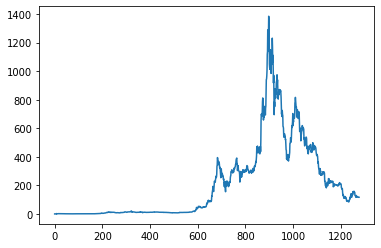

In [13]:
plt.plot(df["Value"])

In [14]:
yvals=np.array(df["Value"])
xvals=np.arange(0,yvals.shape[0])

In [15]:
coins=1000
cash=2000000

In [16]:
net_assets_beginning=yvals[0]*100+cash

In [17]:
net_assets_beginning

2000000.0

In [18]:
preds=[]
preds.append(yvals[0])
preds.append(yvals[1])


In [19]:
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

for i in np.arange(1,np.array(df["Value"]).shape[0],1):
    x_pairs=[]
    y_pairs=[]
    
    x_pairs.append(xvals[i-1])
    x_pairs.append(xvals[i])
    

    y_pairs.append(yvals[i-1])
    y_pairs.append(xvals[i])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(df["Value"]).shape[0]-1:
        
        regression=LinearRegression().fit(x_pairs, y_pairs)
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))


        
        preds.append(pred)
        
        if pred-yvals[i]>0:
            
            if coins==1000:
                
                pass
            
            else:
                
                coins=1000
                cash=cash-(1000*yvals[i]) 
        
        else:
            
            if coins==1000:
                
                coins=0
                cash=cash+(1000*yvals[i])
                
            else:
                
                pass
                
    else:
        
        pass

In [20]:
cash

2111740.0

In [21]:
coins

1000

In [22]:
net_assets_end=cash+(coins*np.array(df["Value"])[-1])

In [23]:
net_assets_end

2228230.0

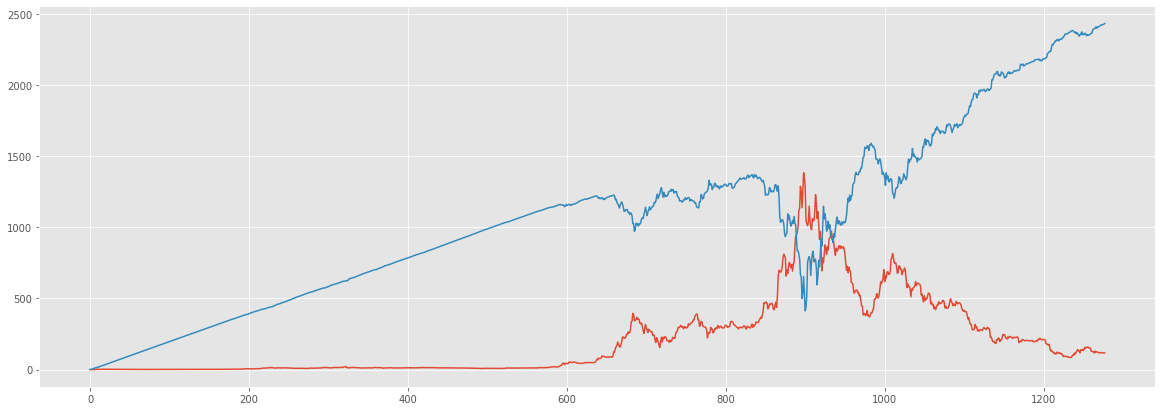

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(xvals,yvals)
plt.plot(xvals,preds)

In [25]:
net_assets_end-net_assets_beginning

228230.0